# Data Exploration

This python file opens and cleans the basic datasets

Let's import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

We're loading the training dataset and explore the its features.

In [3]:
#data set from kaggle: https://www.kaggle.com/competitions/grupo-bimbo-inventory-demand/data

# Define the chunk size
chunk_size = 4000000  # Adjust the chunk size based on your memory capacity
chunks = pd.read_csv('grupo-bimbo-inventory-demand/train.csv/train.csv', chunksize=chunk_size)

# Now you can work with the 'train' DataFrame
train = next(chunks)
train.shape

(4000000, 11)

## Variable Exploration

### Variables in train.csv
The dataset is organized at product-week-client level.

*    Semana — Week number (From Thursday to Wednesday)
*    Agencia_ID — Sales Depot ID
*    Canal_ID — Sales Channel ID
*    Ruta_SAK — Route ID (Several routes = Sales Depot)
*    Cliente_ID — Client ID
*    NombreCliente — Client name
*    Producto_ID — Product ID
*    NombreProducto — Product Name
*    Venta_uni_hoy — Sales unit this week (integer)
*    Venta_hoy — Sales this week (unit: pesos)
*    Dev_uni_proxima — Returns unit next week (integer)
*    Dev_proxima — Returns next week (unit: pesos)
*    Demanda_uni_equil — Adjusted Demand (integer) (This is the target you will predict)


In [4]:
train = train.rename(columns={'Semana': 'Week_num',
                                  'Agencia_ID': 'Sales_Depot_ID',
                                  'Canal_ID': 'Sales_Channel_ID',
                                  'Ruta_SAK': 'Route_ID',
                                  'Cliente_ID': 'Client_ID',
                                  'Venta_uni_hoy': 'Sales_unit_this_week',
                                  'Venta_hoy': 'Sales_this_week',
                                  'Dev_uni_proxima': 'Returns_unit_next_week',
                                  'Dev_proxima': 'Returns_next_week',
                                  'Demanda_uni_equil': 'Adjusted_demand',
                                  'Producto_ID': 'Product_ID'})

train.head()

,Week_num,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Client_ID,Product_ID,Sales_unit_this_week,Sales_this_week,Returns_unit_next_week,Returns_next_week,Adjusted_demand
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3


### Categorical Variables
Sales Channel ID: I guess these are modes of transit or routes of transit.

Week_num: This is the shipment week.

Product ID: The name of each product is in the 'producto_tabla.csv'

In [5]:
print("Sales Channel ID:", train['Sales_Channel_ID'].value_counts())
print("Week Number:", train['Week_num'].value_counts())

Sales Channel ID: Sales_Channel_ID
1     3728157
4      125337
7       56991
2       38581
6       20665
11      15080
5        8366
8        6823
Name: count, dtype: int64
Week Number: Week_num
3    4000000
Name: count, dtype: int64


In [6]:
print("Product type:", train['Product_ID'].value_counts())

Product type: Product_ID
1240     124123
1242     120951
1250     116477
2233     109033
1284      97120
          ...  
35558         1
43176         1
43014         1
43223         1
31393         1
Name: count, Length: 866, dtype: int64


In [7]:
product_table = pd.read_csv('grupo-bimbo-inventory-demand/producto_tabla.csv.zip', compression="zip")
product_table = product_table.rename(columns={'Producto_ID': 'Product_ID',
                              'NombreProducto': 'Product_Name'})
product_table.head()

,Product_ID,Product_Name
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


In [8]:
product_table['Product_Name'].value_counts()

Product_Name
Bimkingo Clasico Prom 135g LON 49835      1
Totopo Chilaquiles 500g TAB MR 49810      1
Tortillinas 12p 310g NW MTA TR 49782      1
Tortillinas 12p 310g Prom MTA TR 49781    1
Tortillinas 22p 570g NW MTA TR 49779      1
                                         ..
Div Tira Mini Doradita 4p 45g TR 72       1
Burritos Sincro 170g CU LON 53            1
Bimbollos Ext sAjonjoli 6p 480g BIM 41    1
Capuccino Moka 750g NES 9                 1
NO IDENTIFICADO 0                         1
Name: count, Length: 2592, dtype: int64

### What is the price?
A useful practice is to identify the price of each product. I assume over 7 weeks the prices do not vary (which can be checked). The (wholesale) price can be important predictor of demand. 

Another useful practice may be to scrape extra features of the products and include them in the model. For example, regardless of the price, croissant and bagel have different demands.

In [9]:
train['Price'] = train['Sales_this_week']/train['Sales_unit_this_week']
train['Price'].describe()

count    3.982248e+06
mean     1.030003e+01
std      5.889995e+00
min      4.500000e-01
25%      6.860000e+00
50%      8.380000e+00
75%      1.394000e+01
max      6.473600e+02
Name: Price, dtype: float64

In [10]:
print(train.dtypes)

Week_num                    int64
Sales_Depot_ID              int64
Sales_Channel_ID            int64
Route_ID                    int64
Client_ID                   int64
Product_ID                  int64
Sales_unit_this_week        int64
Sales_this_week           float64
Returns_unit_next_week      int64
Returns_next_week         float64
Adjusted_demand             int64
Price                     float64
dtype: object


In [11]:
product_price = train.groupby('Product_ID')['Price'].mean().reset_index()
product_price.head()

,Product_ID,Price
0,72,3.699958
1,73,21.334753
2,100,19.540000
3,106,19.090000
4,108,6.400000


Let's explore the relationship between variables in the dataset. To do so, I extract a 10 percent sample for speed's sake.

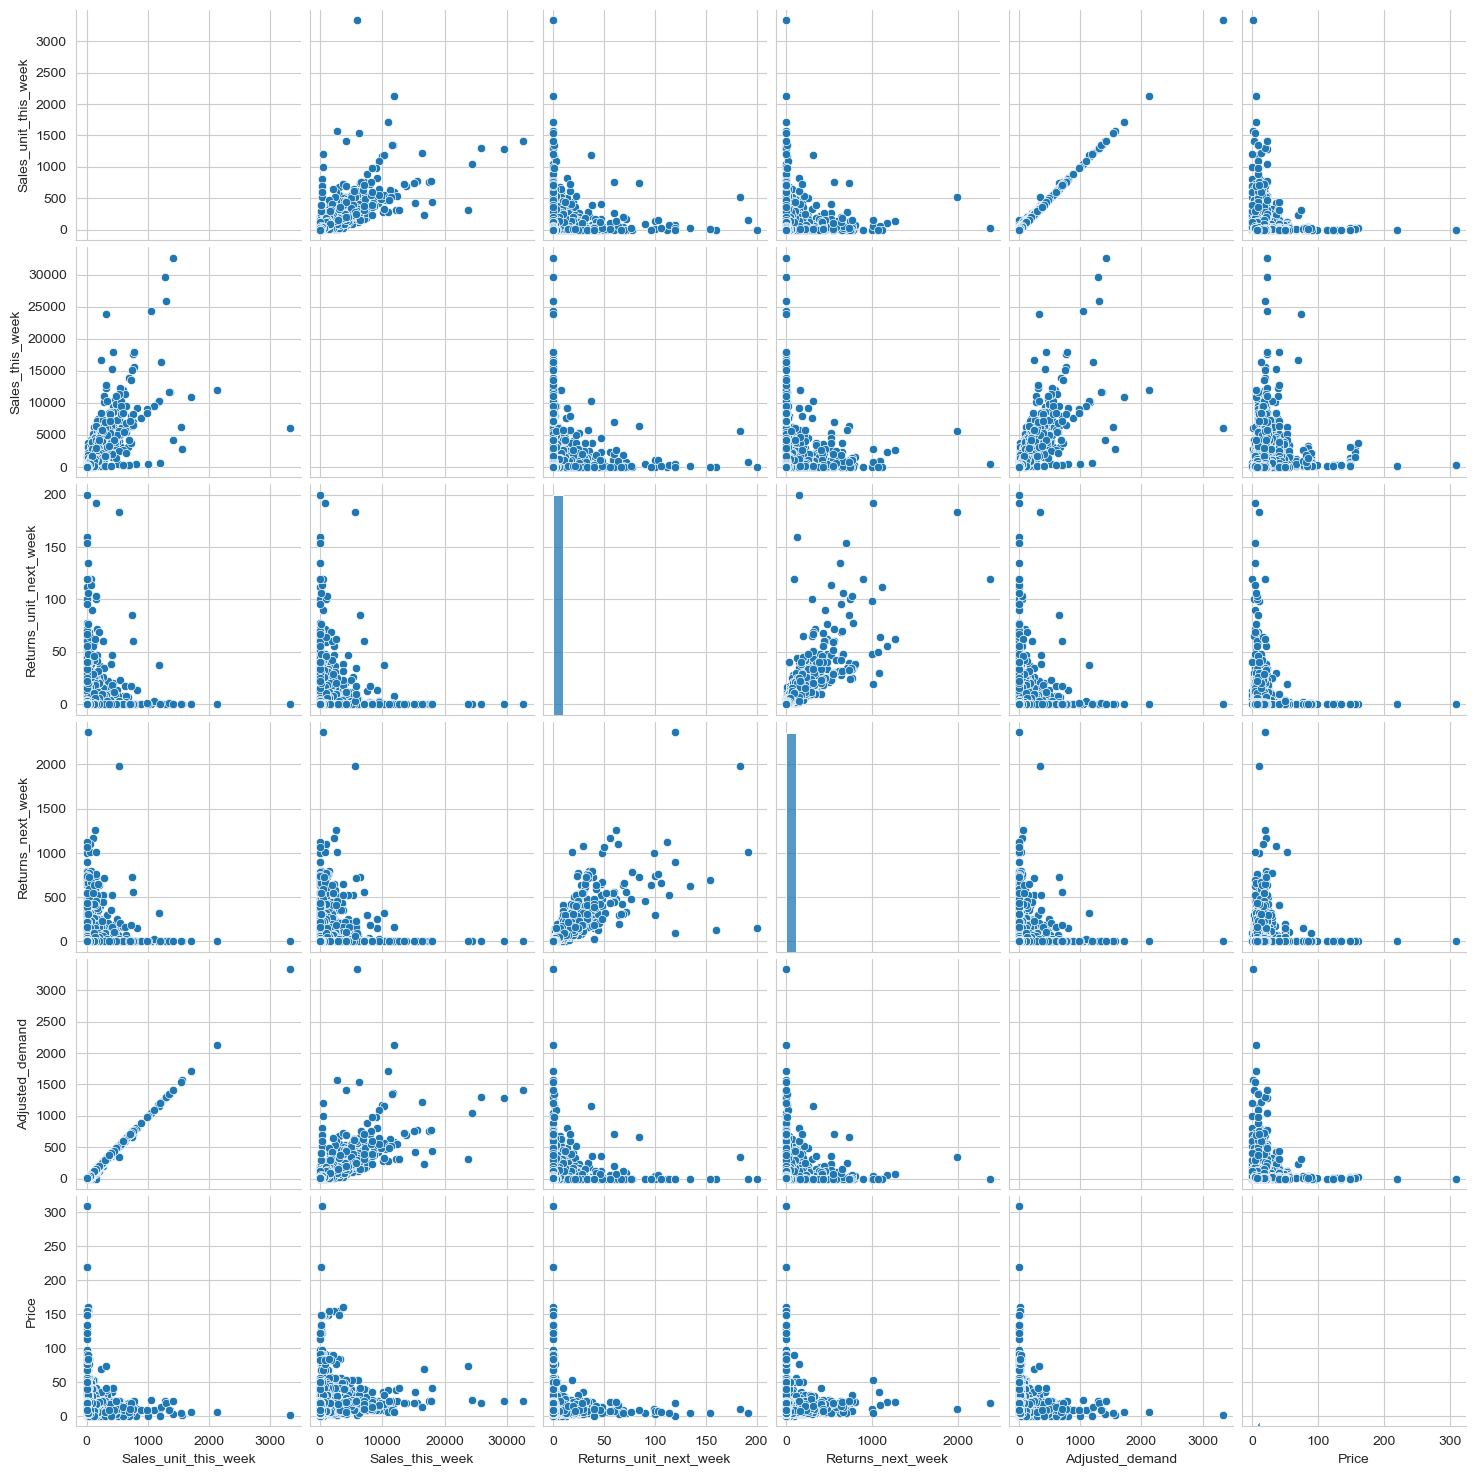

In [12]:
sampled_data = train.sample(frac=0.1, random_state=214)

sns.pairplot(sampled_data[['Sales_unit_this_week', 'Sales_this_week', 'Returns_unit_next_week', 'Returns_next_week', 'Adjusted_demand', 'Price']])

Let's load 'cliente_tabla' and 'town_state.csv'


In [13]:
client_table = pd.read_csv('grupo-bimbo-inventory-demand/cliente_tabla.csv.zip', compression="zip")
client_table = client_table.rename(columns={'Cliente_ID': 'Client_ID',
                                'NombreCliente': 'Client_Name'})

In [14]:
town_state = pd.read_csv('grupo-bimbo-inventory-demand/town_state.csv.zip', compression="zip")
town_state = town_state.rename(columns={'Agencia_ID': 'Sales_Depot_ID',
                          'Town': 'Town',
                          'State': 'State'})

In [15]:
print(town_state['Town'].unique().shape)
print(town_state['Sales_Depot_ID'].unique().shape)

(260,)
(790,)


### Distribution of clients
Here I merged the town_state with 'train' to identify the town and state of each client. Then I aggregate the demand at town-product, town, and state level and draw the distribution of number of unique clients. Most town-product pairs have a small number of clients. Small number of clients means more demand for the products and fewer returns.

Note that

* The variable 'town' does have a number before the name. It does not seem to represent anything such as an address.
* I should winsorize the number of unique clients at 95 percent for better-looking graph.

In [16]:
train = train.merge(town_state, on='Sales_Depot_ID', how='left', copy=False)

In [17]:
town_product_demand = train.groupby(['Town', 'Product_ID' , 'Week_num'], as_index=False).agg({'Sales_unit_this_week': 'sum',
                                                                        'Sales_this_week': 'sum',
                                                                        'Returns_unit_next_week': 'sum',
                                                                        'Returns_next_week': 'sum',
                                                                        'Adjusted_demand': 'sum',
                                                                        'Price': 'mean',
                                                                        'Client_ID': 'nunique'})
town_product_demand = town_product_demand.rename(columns={'Client_ID': 'Unique_clients'})

Text(0.5, 1.0, 'Distribution of unique clients across Town-Product Markets')

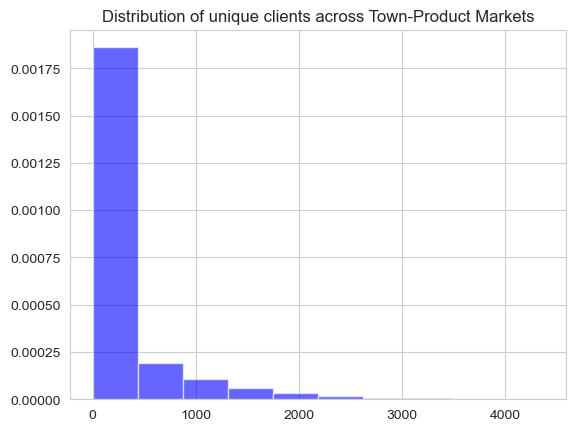

In [18]:
town_product_demand['Unique_clients'].hist(rwidth = 10, density=True, alpha=0.6, color='blue')
plt.title('Distribution of unique clients across Town-Product Markets')

In [19]:
town_demand = train.groupby(['Town', 'Week_num'], as_index=False).agg({'Sales_this_week': 'sum',
                                                                        'Returns_next_week': 'sum',
                                                                        'Price': 'mean',
                                                                        'Client_ID': 'nunique'})
town_demand = town_demand.rename(columns={'Client_ID': 'Unique_clients'})

Text(0.5, 1.0, 'Distribution of unique clients across Towns')

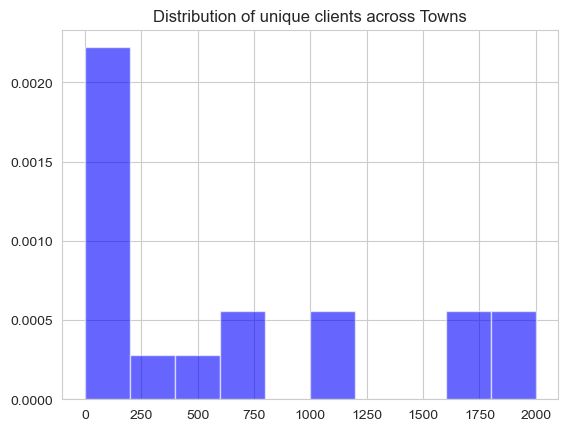

In [20]:
town_demand['Unique_clients'].hist(range=(0,2000), density=True, alpha=0.6, color='blue')
plt.title('Distribution of unique clients across Towns')

In [21]:
state_product_demand = train.groupby(['State', 'Product_ID' , 'Week_num'], as_index=False).agg({'Sales_unit_this_week': 'sum',
                                                                        'Sales_this_week': 'sum',
                                                                        'Returns_unit_next_week': 'sum',
                                                                        'Returns_next_week': 'sum',
                                                                        'Adjusted_demand': 'sum',
                                                                        'Price': 'mean',
                                                                        'Client_ID': 'nunique'})
state_product_demand = state_product_demand.rename(columns={'Client_ID': 'Unique_clients'})

Text(0.5, 1.0, 'Distribution of unique clients across State-Product Markets')

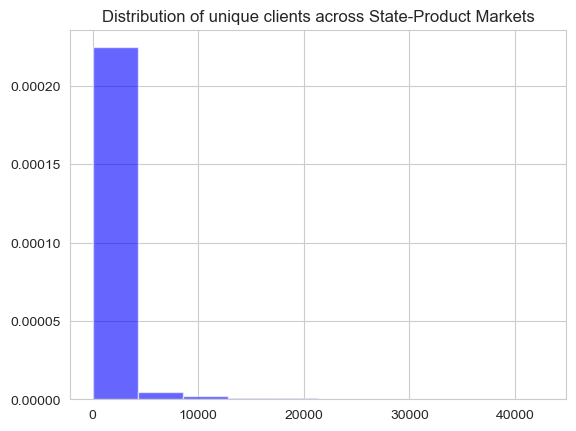

In [22]:
state_product_demand['Unique_clients'].hist(rwidth = 1, density=True, alpha=0.6, color='blue')
plt.title('Distribution of unique clients across State-Product Markets')

### What is the relationship of Sales and Price?

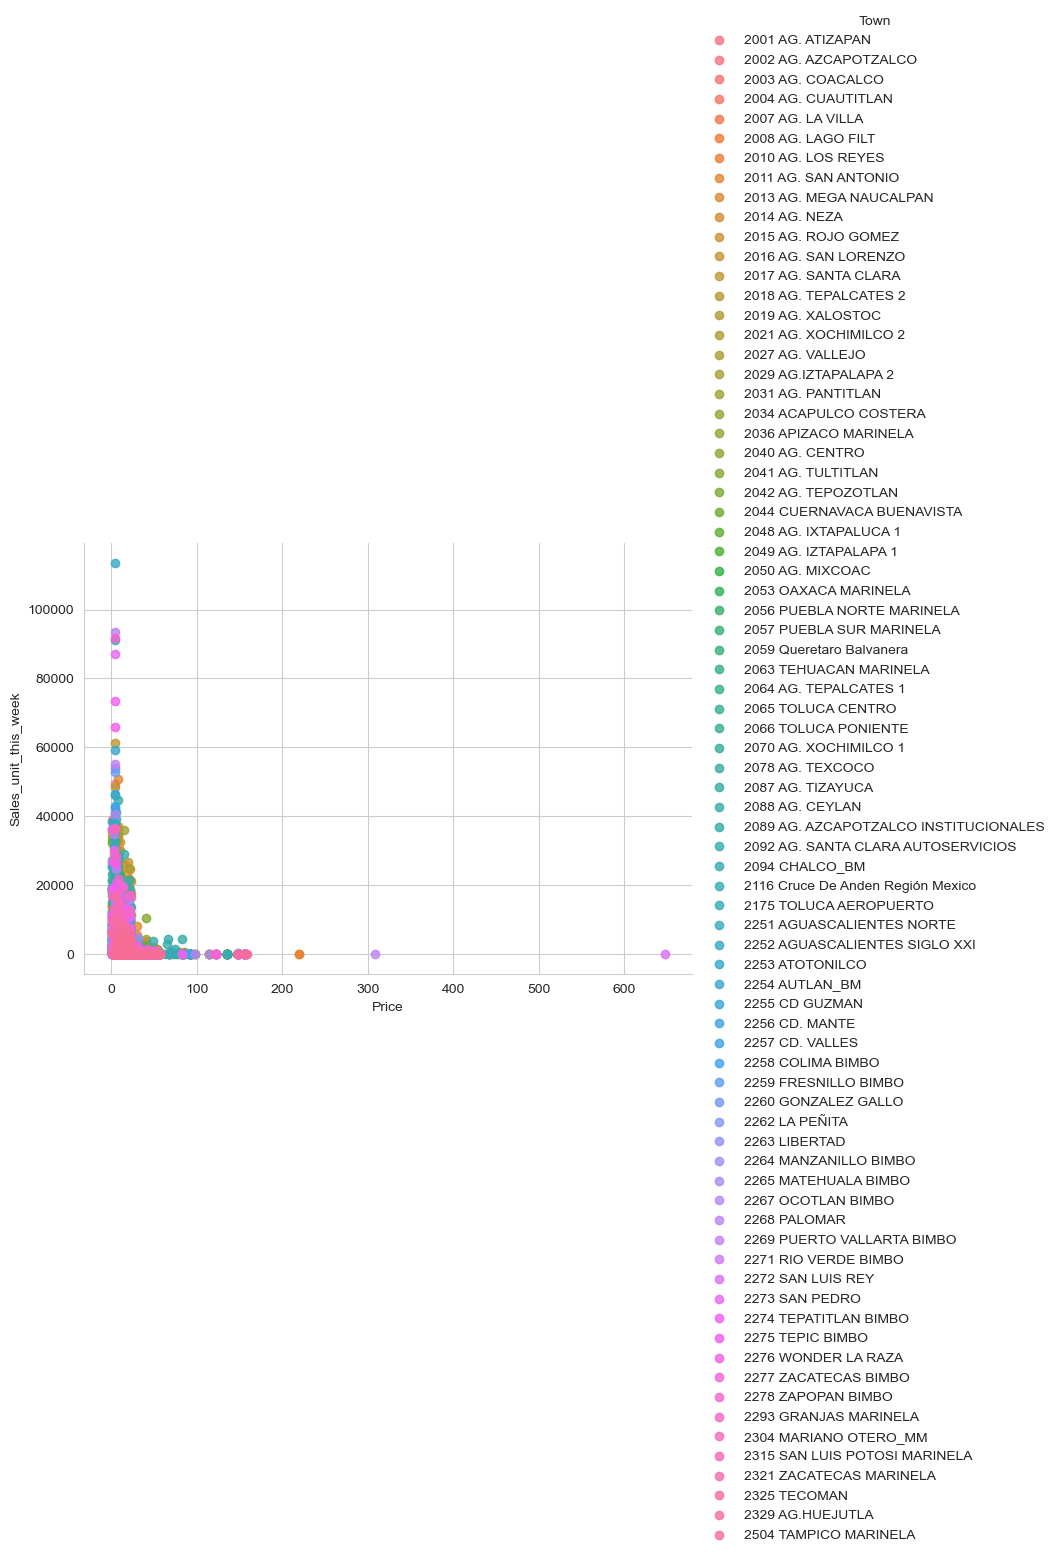

In [23]:
sns.lmplot(data=town_product_demand, y='Sales_unit_this_week', x='Price', fit_reg=False, hue='Town', aspect=1.5)

What's the distribution of sales, demand, and return by state? Merge 'town_state' and 'train' to aggregate the data and compute the histogram.

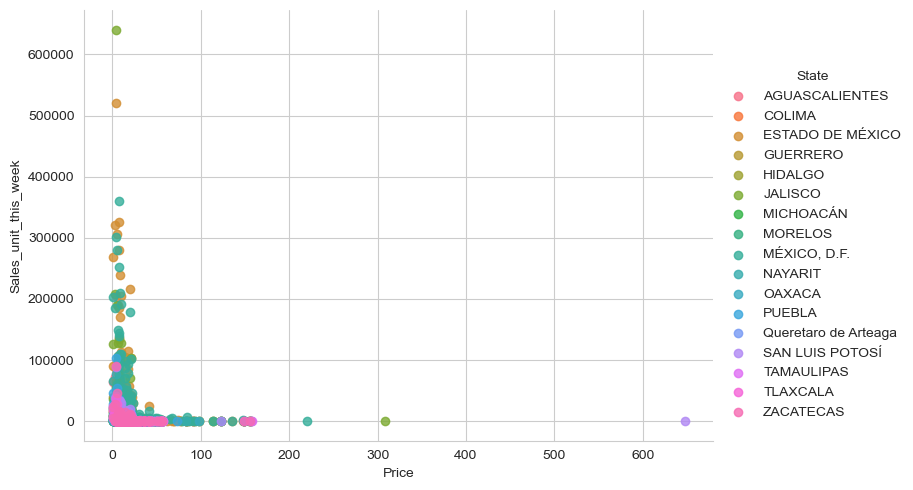

In [28]:
sns.lmplot(data=state_product_demand, y='Sales_unit_this_week', x='Price', fit_reg=False, hue='State', aspect=1.5)

# Next Week
* A good addition to the project is a heatmap of the demand across Mexico
* What are the sales depots?
* What are the channel sales?
* We have a lot of zeros for adjusted demand. A nonlinear model may be more appropriate.
